In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
def sample_first_prows(data, perc=0.75):
    return data.head(int(len(data)*(perc)))

### Dataset

In [3]:
filename = '/home/hugo/projetos-doutorado/mimo_emb_fts/data/HomeC.csv'
#df = pd.read_csv(filename,parse_dates=['time'], index_col='time')
df = pd.read_csv(filename,sep=',')
df = df.drop(labels=['icon','summary','cloudCover', 'House overall [kW]','time'], axis=1)
df = df.loc[0: : 10]
df.dropna(inplace=True)
df

/home/hugo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,use [kW],gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
0,0.932833,0.003483,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,...,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
10,1.585083,0.003417,0.000050,0.022100,0.678733,0.440200,0.121450,0.007433,0.013583,0.000350,...,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
20,0.533817,0.003450,0.000000,0.020633,0.062967,0.270033,0.004950,0.007033,0.013117,0.000750,...,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
30,1.190950,0.003083,0.000217,0.387400,0.061883,0.256867,0.004933,0.101783,0.012533,0.000700,...,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
40,1.582083,0.003067,0.000050,0.022050,0.681717,0.242433,0.005550,0.122400,0.013550,0.000567,...,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503860,1.621417,0.004183,0.000033,0.441950,0.645467,0.041767,0.129317,0.008067,0.012883,0.000317,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503870,0.896250,0.004150,0.000233,0.496633,0.063000,0.042317,0.123800,0.007850,0.012433,0.000467,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503880,1.311617,0.004167,0.000017,0.359167,0.645433,0.041917,0.005133,0.008167,0.013083,0.000650,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503890,2.059367,0.003383,0.000033,0.153367,0.643300,0.042050,0.005117,0.008283,0.013267,0.000433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50391 entries, 0 to 503900
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   use [kW]             50391 non-null  float64
 1   gen [kW]             50391 non-null  float64
 2   Dishwasher [kW]      50391 non-null  float64
 3   Furnace 1 [kW]       50391 non-null  float64
 4   Furnace 2 [kW]       50391 non-null  float64
 5   Home office [kW]     50391 non-null  float64
 6   Fridge [kW]          50391 non-null  float64
 7   Wine cellar [kW]     50391 non-null  float64
 8   Garage door [kW]     50391 non-null  float64
 9   Kitchen 12 [kW]      50391 non-null  float64
 10  Kitchen 14 [kW]      50391 non-null  float64
 11  Kitchen 38 [kW]      50391 non-null  float64
 12  Barn [kW]            50391 non-null  float64
 13  Well [kW]            50391 non-null  float64
 14  Microwave [kW]       50391 non-null  float64
 15  Living room [kW]     50391 non-null

In [5]:
#sns.boxplot(x="time", y="temperature", data=df)

<AxesSubplot:>

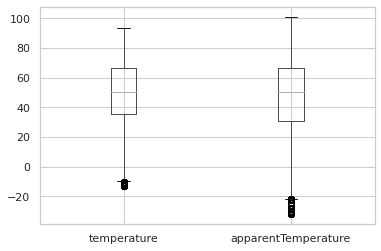

In [6]:
df.boxplot(column=['temperature', 'apparentTemperature'])

<AxesSubplot:>

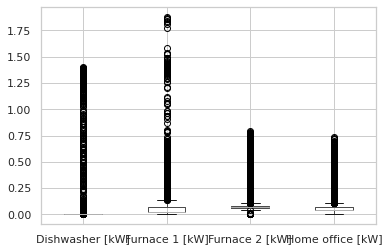

In [7]:
df.boxplot(column=['Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]'])

<AxesSubplot:>

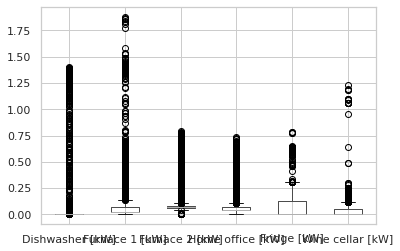

In [8]:
df.boxplot(column=['Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]','Fridge [kW]','Wine cellar [kW]'])

In [9]:
df = sample_first_prows(df, perc=0.1)

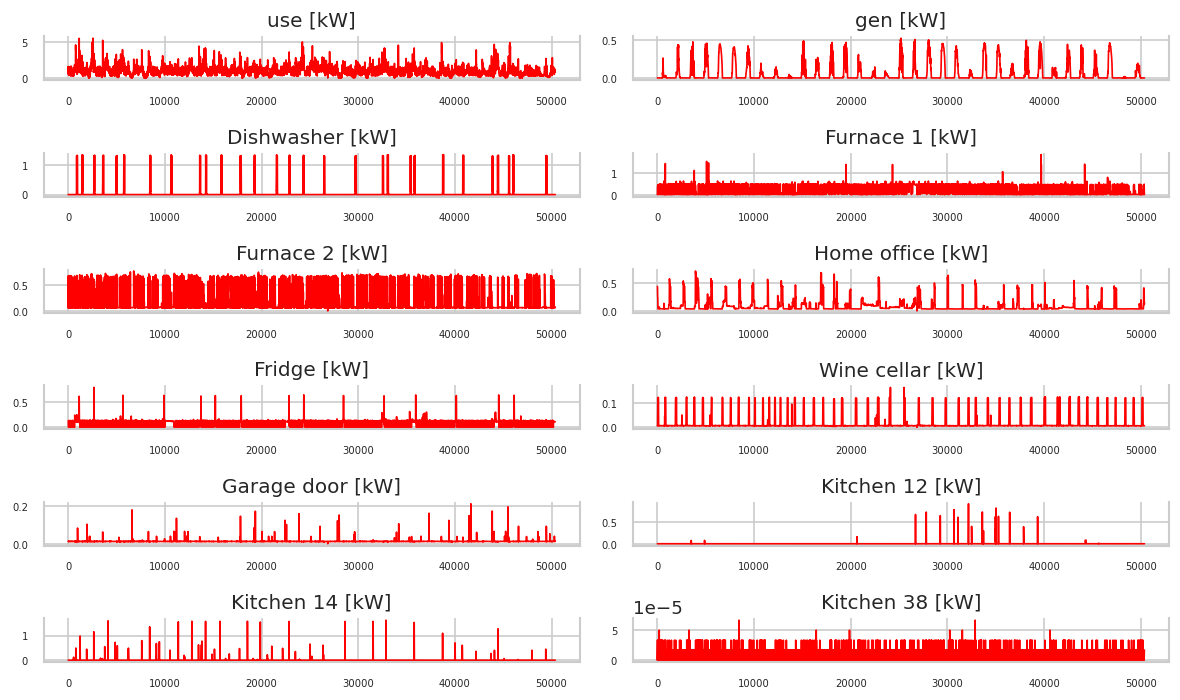

In [10]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Testing Causation using Granger’s Causality Test

In [11]:
# from statsmodels.tsa.stattools import grangercausalitytests
# maxlag=12
# test = 'ssr_chi2test'
# def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
#     """Check Granger Causality of all possible combinations of the Time series.
#     The rows are the response variable, columns are predictors. The values in the table 
#     are the P-Values. P-Values lesser than the significance level (0.05), implies 
#     the Null Hypothesis that the coefficients of the corresponding past values is 
#     zero, that is, the X does not cause Y can be rejected.

#     data      : pandas dataframe containing the time series variables
#     variables : list containing names of the time series variables.
#     """
#     df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

# grangers_matrix = grangers_causation_matrix(df, variables = df.columns)     

In [12]:
# grangers_matrix

In [13]:
# f, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(grangers_matrix, cmap='RdYlGn_r', annot=True,linewidths=.5)

### Correlation Test

<AxesSubplot:>

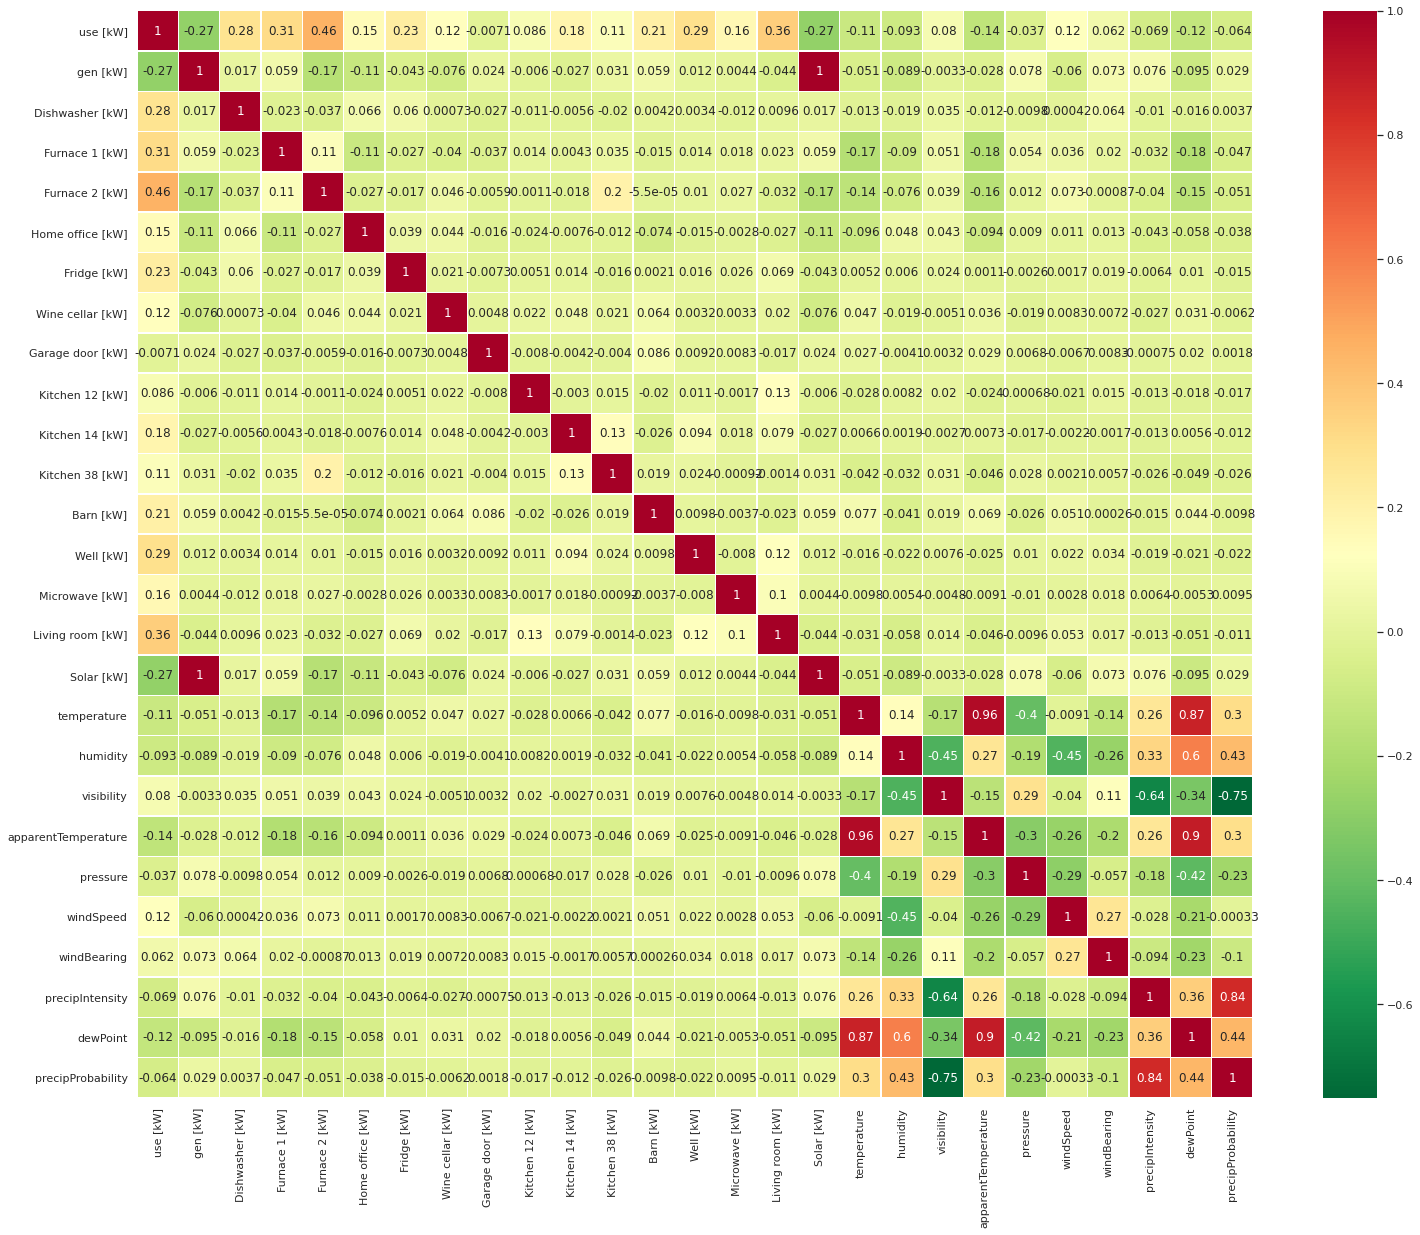

In [14]:
cov_data= df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(cov_data, cmap='RdYlGn_r', annot=True,linewidths=.5)

In [15]:
cov_data= df.corr()
cov_data

,use [kW],gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
use [kW],1.000000,-0.274095,0.276510,0.309338,0.457756,0.150300,0.225406,0.124913,-0.007148,0.086432,...,-0.107135,-0.093076,0.080240,-0.138781,-0.037071,0.119014,0.062378,-0.068894,-0.123818,-0.064202
gen [kW],-0.274095,1.000000,0.017209,0.059035,-0.168536,-0.110732,-0.043428,-0.076239,0.024404,-0.005971,...,-0.050872,-0.088756,-0.003301,-0.028161,0.077536,-0.059937,0.073210,0.076165,-0.094976,0.029282
Dishwasher [kW],0.276510,0.017209,1.000000,-0.023099,-0.036791,0.066181,0.059995,0.000734,-0.027135,-0.010967,...,-0.012599,-0.018671,0.034854,-0.012037,-0.009789,0.000425,0.064202,-0.010207,-0.016262,0.003696
Furnace 1 [kW],0.309338,0.059035,-0.023099,1.000000,0.107633,-0.105241,-0.027000,-0.040421,-0.037243,0.014373,...,-0.174077,-0.089811,0.051288,-0.182479,0.054130,0.036185,0.019799,-0.031744,-0.182730,-0.046760
Furnace 2 [kW],0.457756,-0.168536,-0.036791,0.107633,1.000000,-0.026884,-0.016961,0.046423,-0.005852,-0.001073,...,-0.144191,-0.075546,0.039216,-0.161902,0.012424,0.072985,-0.000866,-0.040044,-0.150057,-0.050696
Home office [kW],0.150300,-0.110732,0.066181,-0.105241,-0.026884,1.000000,0.039047,0.044326,-0.015514,-0.024118,...,-0.095959,0.047772,0.043065,-0.093991,0.008969,0.010541,0.012592,-0.042856,-0.058152,-0.038055
Fridge [kW],0.225406,-0.043428,0.059995,-0.027000,-0.016961,0.039047,1.000000,0.021034,-0.007287,0.005145,...,0.005184,0.005986,0.023900,0.001110,-0.002645,0.001718,0.019035,-0.006415,0.010485,-0.015490
Wine cellar [kW],0.124913,-0.076239,0.000734,-0.040421,0.046423,0.044326,0.021034,1.000000,0.004756,0.022243,...,0.047155,-0.019159,-0.005147,0.036347,-0.018831,0.008330,0.007226,-0.027218,0.031420,-0.006223
Garage door [kW],-0.007148,0.024404,-0.027135,-0.037243,-0.005852,-0.015514,-0.007287,0.004756,1.000000,-0.008017,...,0.027027,-0.004072,0.003183,0.029096,0.006845,-0.006683,0.008324,-0.000747,0.019834,0.001788
Kitchen 12 [kW],0.086432,-0.005971,-0.010967,0.014373,-0.001073,-0.024118,0.005145,0.022243,-0.008017,1.000000,...,-0.028291,0.008219,0.020163,-0.024081,0.000681,-0.020561,0.015351,-0.013015,-0.017986,-0.017392


In [16]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(df)

In [24]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [25]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "use [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.7061
 No. Lags Chosen       = 22
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gen [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.9827
 No. Lags Chosen       = 20
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dishwasher [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signif

    Augmented Dickey-Fuller Test on "apparentTemperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.3996
 No. Lags Chosen       = 30
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pressure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7038
 No. Lags Chosen       = 29
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0041. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "windSpeed" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [26]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "use [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -28.3469
 No. Lags Chosen       = 12
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gen [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.1793
 No. Lags Chosen       = 32
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dishwasher [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signif

    Augmented Dickey-Fuller Test on "apparentTemperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.8514
 No. Lags Chosen       = 29
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pressure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3213
 No. Lags Chosen       = 28
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "windSpeed" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

### KPSS test

In [27]:
# regression='ct'
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, name='', **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [28]:
for name, column in df.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "use [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.8249225507124451
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "gen [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.055422693378787385
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Dishwasher [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.03604596101674864
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Furnace 1 [kW]" 
    -----------------------------------------------
KPSS Statistic: 1.5897327759285913
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

In [29]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

KPSS Test on "use [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0032883580944020325
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "gen [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.003569113631214167
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Dishwasher [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0033048726531757027
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Furnace 1 [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.006236412878451514
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series i

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

<AxesSubplot:>

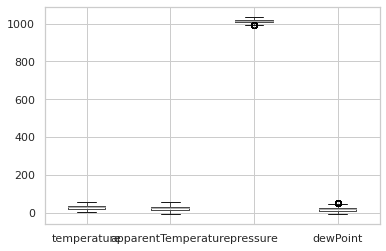

In [30]:
df.boxplot(column=['temperature', 'apparentTemperature', 'pressure','dewPoint'])

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
# ax.plot(df['temperature'][0:2000], label='temperature')
# #ax.plot(df['apparentTemperature'][0:100], label='apparentTemperature') 
# # ax.plot(df['pressure'][0:100], label='pressure')
# # ax.plot(df['dewPoint'][0:100], label='dewPoint')
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
# plt.show()